In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
import pandas as pd

file_path = r"D:\downloads\ecommerce.csv"
data = pd.read_csv(file_path)

print(data.head())


    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method  Unnamed: 7  
0             31.05    Net Banking         NaN  
1            186.23    Net Banking         NaN  
2            237.76    Credit Card         NaN  
3            129.89            UPI         NaN  
4            195.84    Net Banking         NaN  


In [ ]:
import pandas as pd

file_path = r"D:\downloads\ecommerce.csv"
data = pd.read_csv(file_path)

data = data.drop(columns=["User_ID", "Product_ID"], errors='ignore')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

print(df.head())


   Category  Price (Rs.)  Discount (%)  Final_Price(Rs.) Payment_Method
0    Sports        36.53            15             31.05    Net Banking
1  Clothing       232.79            20            186.23    Net Banking
2    Sports       317.02            25            237.76    Credit Card
3      Toys       173.19            25            129.89            UPI
4    Beauty       244.80            20            195.84    Net Banking


In [ ]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates if necessary
df = df.drop_duplicates()


Number of duplicate rows: 0


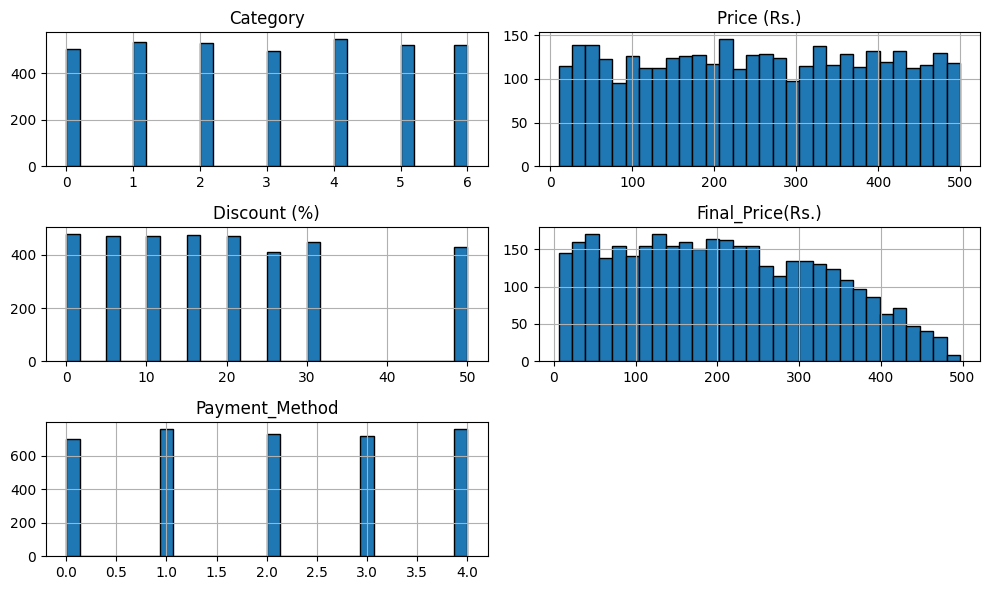

In [ ]:
# Histograms for numerical variables
df.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()


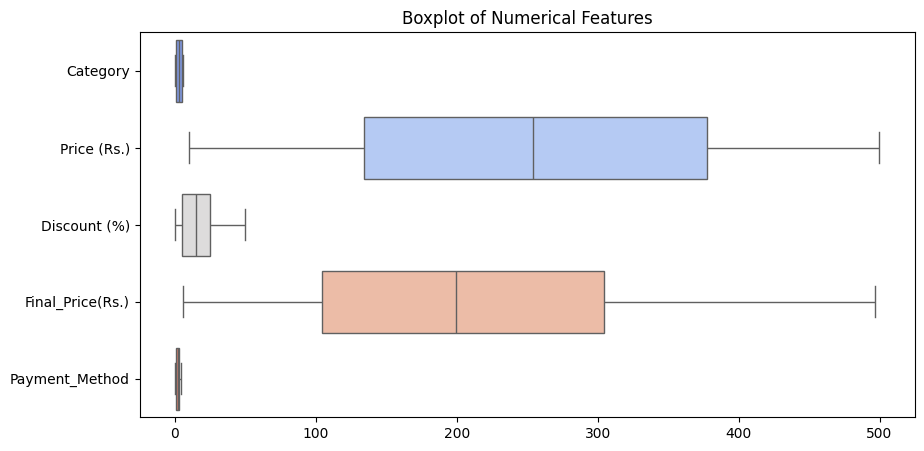

In [ ]:
# Boxplot for numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient="h", palette="coolwarm")
plt.title("Boxplot of Numerical Features")
plt.show()


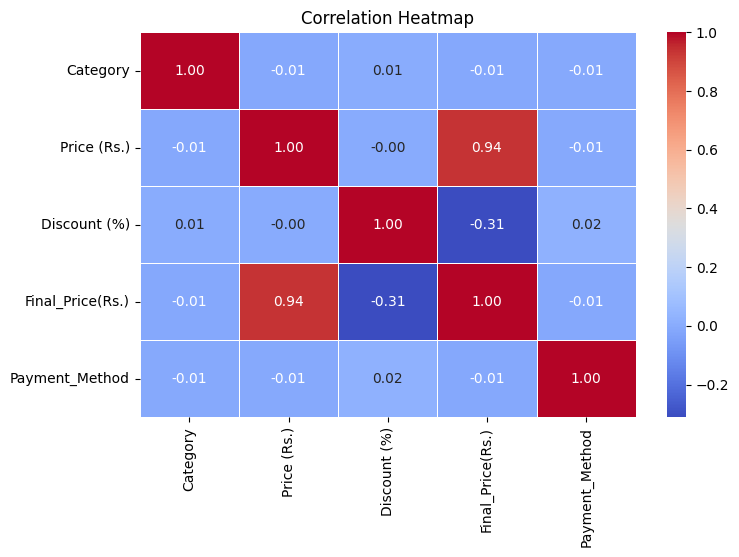

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


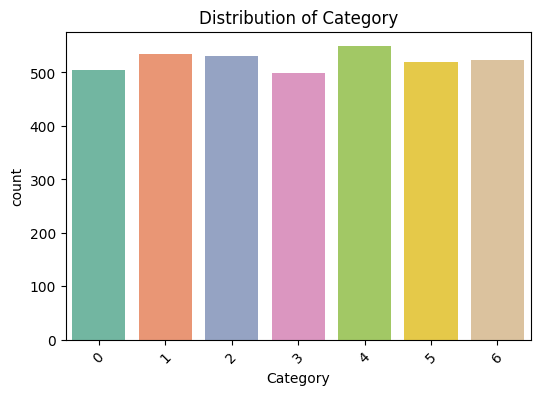

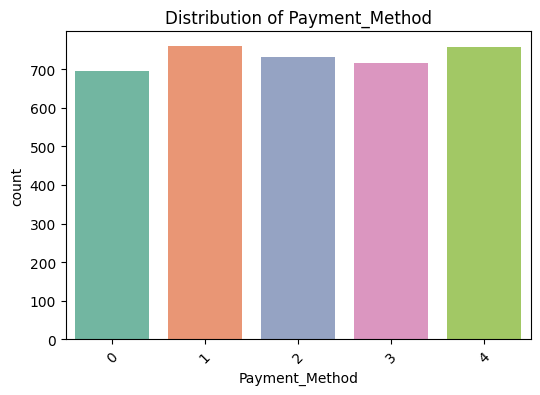

In [ ]:
# Count plots for categorical variables
categorical_columns = ["Category", "Payment_Method"]

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify categorical columns
categorical_columns = ["Category", "Payment_Method"]  # Adjust based on your dataset

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Normalize numerical values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print(df_scaled[:5])  # Display first 5 rows of scaled data


[[ 0.99714519 -1.54077118 -0.2596953  -1.43356182  0.69363403]
 [-0.50761762 -0.1553732   0.07976356 -0.168553    0.69363403]
 [ 0.99714519  0.43920578  0.41922241  0.2515134  -0.72384255]
 [ 1.49873279 -0.57608919  0.41922241 -0.62782995  1.40237232]
 [-1.51079282 -0.07059469  0.07976356 -0.09021343  0.69363403]]


In [ ]:
#Categorical Encoding and Normalization
In order to prepare the dataset for K-Means clustering, we need to ensure that all data is numerical and properly scaled. Since our dataset contains
categorical columns such as "Category" and "Payment_Method", they must be converted into numerical values before applying clustering algorithms.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [ ]:
wcss = []
K_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

print(wcss)  # Prints the WCSS values for each K


[18299.999999999985, 12986.506191124447, 11057.352367266547, 9726.867735478392, 8527.868930406054, 7790.217455083328, 7042.680189274529, 6585.473995761578, 6111.645578753478, 5663.960196340133]


In [ ]:
#Interpreting the WCSS Values for Optimal Clusters
The Within-Cluster Sum of Squares (WCSS) represents the total variance within clusters and helps determine the optimal number of clusters for K-Means.
As the number of clusters (K) increases from 1 to 10, we observe a consistent decrease in WCSS values: [18299.99, 12986.50, 11057.35, 9726.86, 8527.86, 7790.21, 7042.68, 6585.47, 6111.64, 5663.96].
This decline occurs because adding more clusters reduces the intra-cluster distance, making each cluster more compact. However, the goal is to identify
the point where adding extra clusters results in diminishing improvements—this is called the "elbow point". From the given values, the WCSS shows a
sharp decline up to K=4 or K=5, after which the reduction slows. This suggests that around 4 to 5 clusters might be an optimal choice, balancing
compactness and efficiency in clustering without unnecessary complexity.

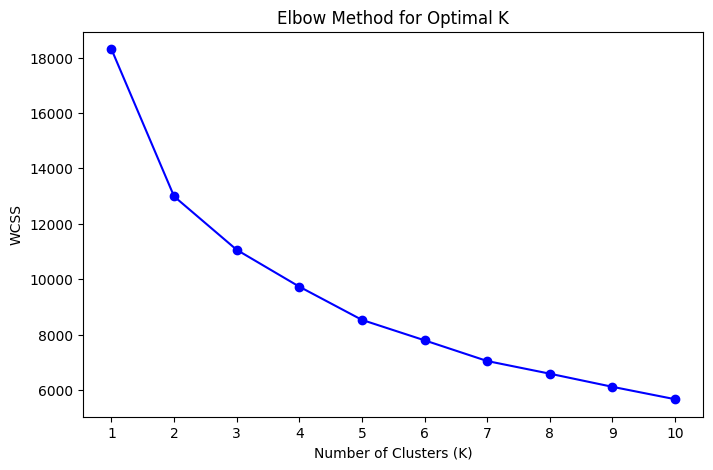

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.show()


In [ ]:
#Interpreting the Elbow Method Plot
The Elbow Method plot visually represents the WCSS values for different numbers of clusters (K) to determine the optimal number of clusters.
The x-axis denotes the number of clusters, while the y-axis shows the Within-Cluster Sum of Squares (WCSS). The curve exhibits a sharp decline
initially but gradually levels off, forming an "elbow" shape.
From the plotted graph, we observe a significant drop in WCSS up to K = 4 or K = 5, after which the reduction slows. This indicates that increasing
clusters beyond this point results in minimal improvements, meaning the data is already well-clustered. The ideal choice for K is typically at the
"elbow point," which, based on the trend, appears to be 4 or 5 clusters. Choosing a K value around this ensures a good balance between compact clusters
and computational efficiency.

In [ ]:
#Silhouette Score (Higher is Better)

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Define the optimal number of clusters (replace K with the best value from the elbow method)
K = 3

kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.2467


In [ ]:
#Interpreting the Silhouette Score
The Silhouette Score measures how well-defined the clusters are, ranging from -1 to 1, where:

Closer to 1 → Well-separated and dense clusters (good clustering).
Near 0 → Clusters are overlapping (borderline clustering).
Negative values → Samples are assigned to the wrong clusters.
In this case, the Silhouette Score is 0.2467, which suggests that the clustering structure is present but not very strong.
This indicates that while the clusters are distinguishable, they may still have some overlap. To improve clustering, we could
try tuning K (number of clusters), using different distance metrics, or applying feature selection/dimensionality reduction
techniques to enhance separability.

In [ ]:
#Davies-Bouldin Index (Lower is Better)

from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
dbi_score = davies_bouldin_score(df_scaled, cluster_labels)

print(f"Davies-Bouldin Index: {dbi_score:.4f}")


Davies-Bouldin Index: 1.4911


In [ ]:
#Interpreting the Davies-Bouldin Index (DBI)
The Davies-Bouldin Index (DBI) evaluates the quality of clustering by measuring the compactness and separation between clusters.
The lower the DBI score, the better the clustering performance.
Lower DBI (closer to 0) → Well-separated and compact clusters (better clustering).
Higher DBI → Overlapping or loosely packed clusters (poor clustering).
In this case, the DBI score is 1.4911, indicating that the clusters are somewhat distinguishable but not highly compact.
A DBI score close to 1.0 or lower is typically desirable. To improve clustering, we might consider changing the number of clusters (K),
normalizing features differently, or applying dimensionality reduction techniques to enhance separation.

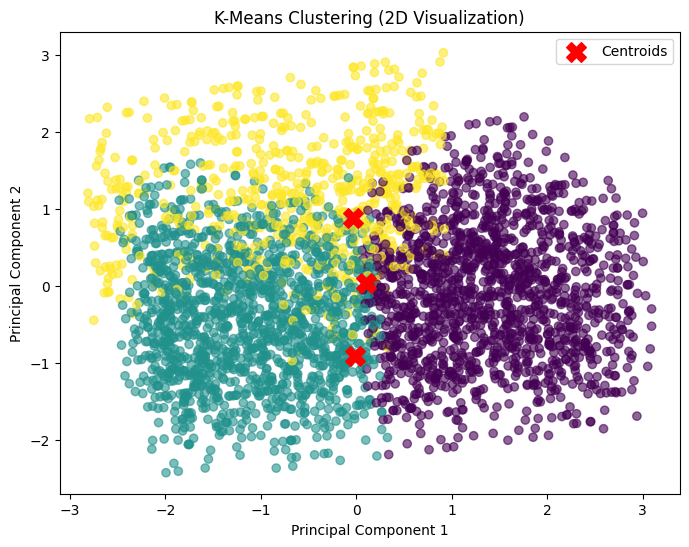

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering (2D Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


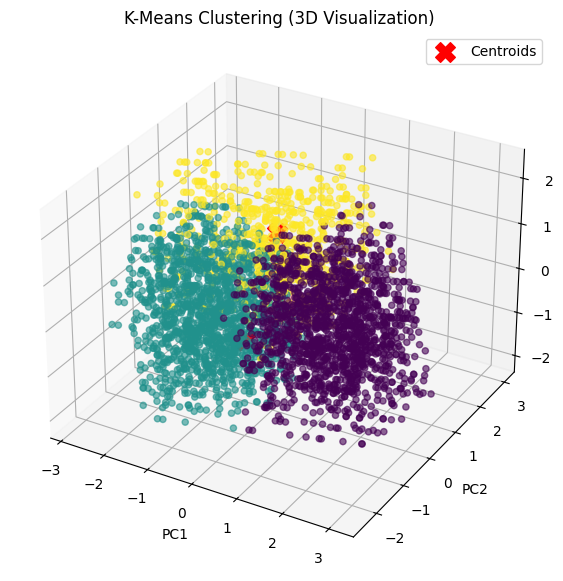

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3D using PCA
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')

ax.set_title("K-Means Clustering (3D Visualization)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()


In [ ]:
print(f"Optimal Clusters: {K}")  # Replace K with your chosen cluster count
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

# Count how many points in each cluster
import numpy as np
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))
print("Cluster Distribution:", cluster_distribution)


Optimal Clusters: 3
Silhouette Score: 0.2467
Davies-Bouldin Index: 1.4911
Cluster Distribution: {np.int32(0): np.int64(1513), np.int32(1): np.int64(1475), np.int32(2): np.int64(672)}
